In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split


In [3]:
# Load dataset
recipes = pd.read_csv('/content/recipes_muffins_cupcakes.csv')


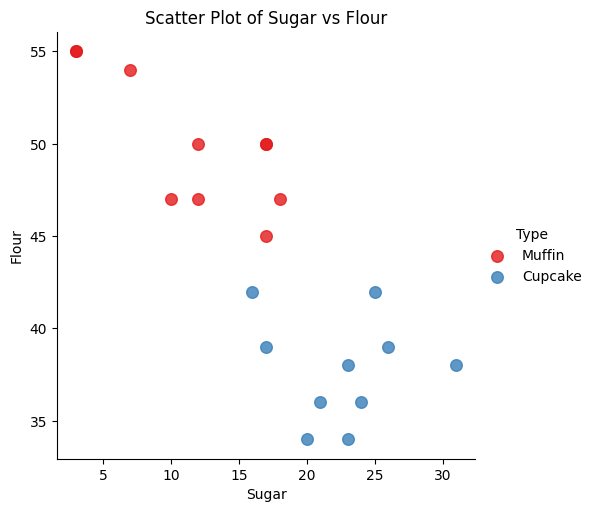

In [4]:
# Scatter plot
sns.lmplot(x='Sugar', y='Flour', data=recipes, hue='Type', palette='Set1', fit_reg=False, scatter_kws={"s": 70})
plt.title("Scatter Plot of Sugar vs Flour")
plt.show()


In [5]:
# Prepare data
X = recipes[['Sugar', 'Flour']].values
y = np.where(recipes['Type'] == 'Muffin', 0, 1)  # Encode 'Muffin' as 0 and 'Cupcake' as 1


In [6]:
# Train SVM model
model = SVC(kernel='linear')
model.fit(X, y)


SVC(kernel='linear')

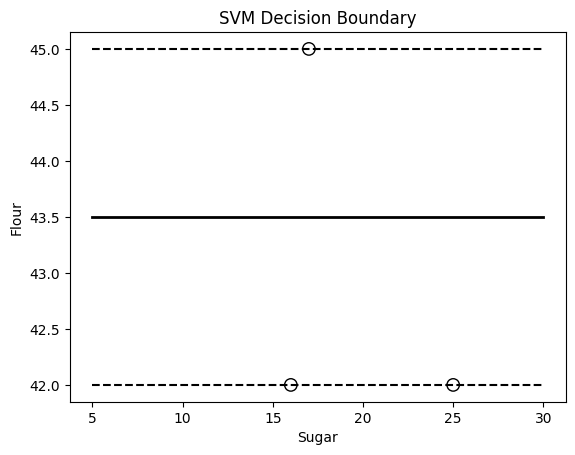

In [7]:
# Decision boundary
w = model.coef_[0]
a = -w[0] / w[1]
xx = np.linspace(5, 30)
yy = a * xx - (model.intercept_[0] / w[1])

# Support vector boundaries
b1, b2 = model.support_vectors_[0], model.support_vectors_[-1]
yy_down = a * xx + (b1[1] - a * b1[0])
yy_up = a * xx + (b2[1] - a * b2[0])

# Plot decision boundary
plt.plot(xx, yy, 'k-', linewidth=2)
plt.plot(xx, yy_down, 'k--', xx, yy_up, 'k--')
plt.scatter(model.support_vectors_[:, 0], model.support_vectors_[:, 1], s=80, facecolors='none', edgecolors='black')
plt.xlabel("Sugar")
plt.ylabel("Flour")
plt.title("SVM Decision Boundary")
plt.show()


In [8]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)


In [9]:
# Train new model & evaluate
model1 = SVC(kernel='linear')
model1.fit(X_train, y_train)
pred = model1.predict(X_test)

print("Confusion Matrix:\n", confusion_matrix(y_test, pred))
print("\nClassification Report:\n", classification_report(y_test, pred))


Confusion Matrix:
 [[2 0]
 [0 2]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         2
           1       1.00      1.00      1.00         2

    accuracy                           1.00         4
   macro avg       1.00      1.00      1.00         4
weighted avg       1.00      1.00      1.00         4

